## FACIAL EMOTION RECOGNITION

In [1]:
# ignoring warings 


import warnings 
warnings.filterwarnings("ignore")

## Data Preparation

In [3]:
# training data preparation for model training

 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_direct = r"C:\Users\Mathivanan\Downloads\face-emotion-data\MMAFEDB\train"
batch_size = 64 
target_size = (48, 48)          # shape of an image 


train_datagen = ImageDataGenerator(
    rescale=1.0/255                       
) 


train_generator = train_datagen.flow_from_directory(
    train_direct,
    target_size=target_size,
    batch_size=batch_size,   
    class_mode="categorical",
    color_mode="grayscale",     # gray scale images 
) 


Found 96320 images belonging to 5 classes.


In [4]:
# classes present and its numeric encodings 


print(train_generator.class_indices)

{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3, 'surprise': 4}


In [5]:
# training data visualization 


import matplotlib.pyplot as plt

def plot_images(images, labels, all_classes, nrows=7, ncols=7):
    plt.figure(figsize=(15, 15)) 

    for i in range(nrows * ncols): 
        label = all_classes[labels[i].argmax()]
        plt.subplot(nrows, ncols, i+1) 
        plt.imshow(images[i].reshape(48, 48), cmap='gray')
        plt.tight_layout()
        plt.title(label) 
        plt.axis('off')

    plt.show()

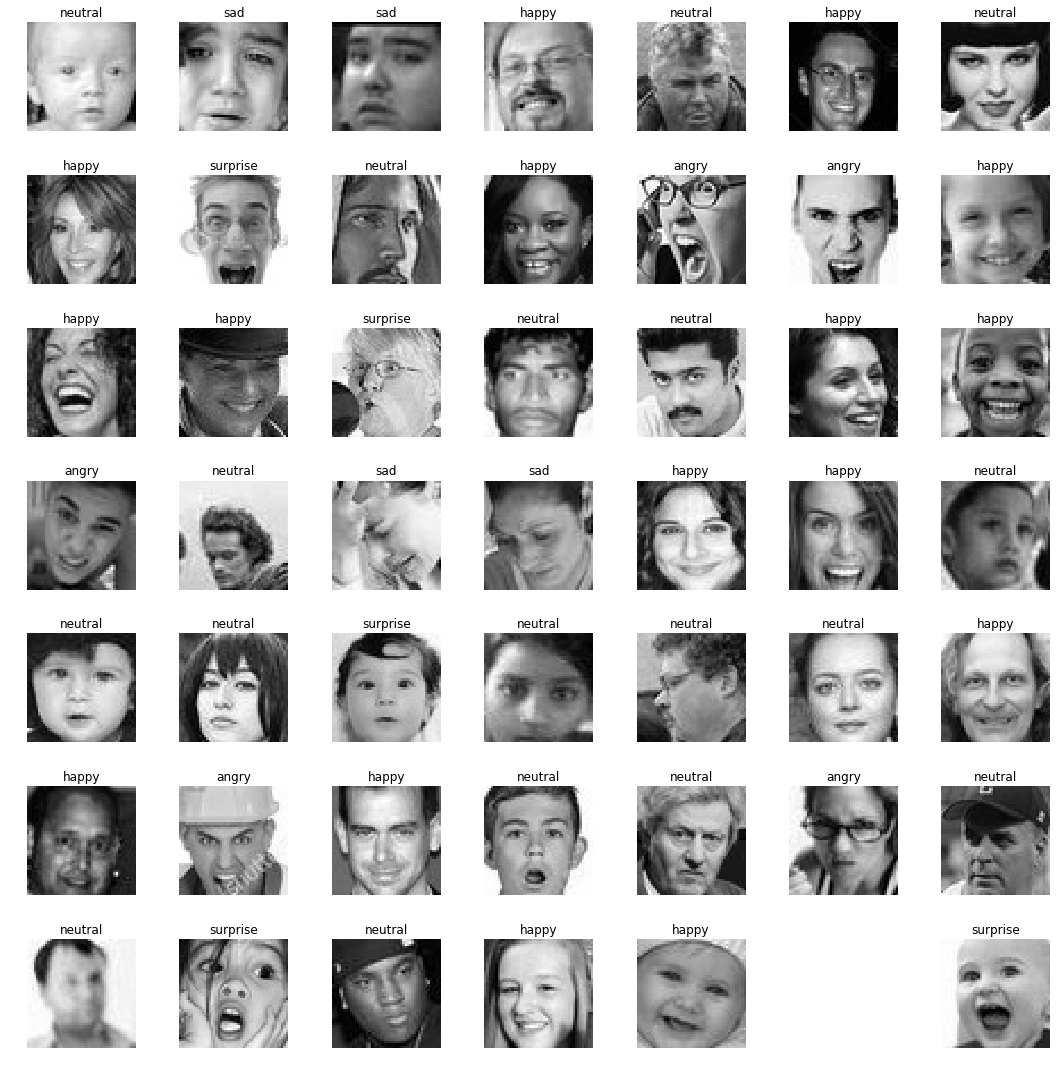

In [6]:
train_images, train_labels = next(train_generator)
class_labels = list(train_generator.class_indices.keys())


plot_images(train_images, train_labels, class_labels) 

## Model Creation 

In [13]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential() 


model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)))


model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.25)) 


model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2,2))) 


model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25)) 


model.add(Flatten()) 


model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.25)) 


model.add(Dense(5, activation='softmax')) 

In [14]:
from tensorflow.keras.optimizers import Adam


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy']) 

## Model Training

In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=96320//64, 
    epochs=100
) 

Epoch 1/100
1505/1505 [==============================] - 36s 24ms/step - loss: 1.2914 - acc: 0.4795
Epoch 2/100
1505/1505 [==============================] - 36s 24ms/step - loss: 1.0551 - acc: 0.5946
Epoch 3/100
1505/1505 [==============================] - 36s 24ms/step - loss: 0.9652 - acc: 0.6306
Epoch 4/100
1505/1505 [==============================] - 36s 24ms/step - loss: 0.9124 - acc: 0.6502
Epoch 5/100
1505/1505 [==============================] - 36s 24ms/step - loss: 0.8721 - acc: 0.6677
Epoch 6/100
1505/1505 [==============================] - 36s 24ms/step - loss: 0.8375 - acc: 0.6823
Epoch 7/100
1505/1505 [==============================] - 36s 24ms/step - loss: 0.8074 - acc: 0.6939
Epoch 8/100
1505/1505 [==============================] - 37s 24ms/step - loss: 0.7823 - acc: 0.7037
Epoch 9/100
1505/1505 [==============================] - 36s 24ms/step - loss: 0.7557 - acc: 0.7145
Epoch 10/100
1505/1505 [==============================] - 36s 24ms/step - loss: 0.7337 - acc: 0.7243

### Accuracy is 97%

## Saving Model 

In [16]:
model.save("faceEmotionRecog.h5") 

In [18]:
# model is tested in live camera and in pictures 